In [212]:
substring_to_match = "BH"
input_file_path = "/Users/ted/Documents/RA/RAW_DATA/DOWNLOAD/nibrs-2021/2021_NIBRS_NATIONAL_MASTER_FILE_ENC.txt"
input_file_path = "/Users/ted/Documents/RA/RAW_DATA/DOWNLOAD/FBI/1998/KCNIBR98.DAT"
input_file_path = "/Users/ted/Documents/RA/DATA/FBI/2018/2018_NIBRS_NATIONAL_MASTER_FILE_ENC.txt"

BH_lines = []
# Open the input file in a read mode
with open(input_file_path, 'r', encoding="latin-1") as file:
    # Use a generator to yield only the lines that start with the desired substring
    matching_lines = (line.replace("\x00", " ").rstrip("\n") for line in file if line.startswith(substring_to_match))

    # You can iterate over matching_lines or process them as needed
    BH_lines.extend(matching_lines)


In [223]:
BH_lines[2000:3000]

['BH05CO03301000000000000002020063019970101Leadville                     CO6 841N         3210060AA        000002785033  0000000000000000000      000000000000000000      000000000000000000      000000000000000000      00000000012122018NYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYN065            20030301',
 'BH05CO03400000000000000002020063020121201Durango                       CO8B842N         3210060AA        000034061034  0000000000000000000      000000000000000000      000000000000000000      000000000000000000      00000000012122018NYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYN067            20130801',
 'BH05CO03401000000000000002020063020120101DURANGO                       CO5 841N         3210060AA        000018717034  0000000000000000000      000000000000000000      000000000000000000      000000000000000000      00000000012122018NYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYN067            20120901',
 'BH05CO034019E0000000000002020063020040701Durango                       CO7 843N         3210060AA        00

In [3]:
import pandas as pd
all_agencies_2021 = pd.DataFrame(
[{"ORI":s[4:13],"POPULATION":int(s[105:114]),"01-06-12 INDICATOR":s[225:227], "NUMBER OF MONTHS REPORTED":int(s[227:229]),"AGENCY ACTIVITY INDICATORS":s[233:269],
  "DATE ORI WENT NIBRS":s[33:41], "AGENCY INACTIVE DATE":s[97:105], "COVERED-BY ORI ":s[79:88], "AGENCY NIBRS FLAG":s[96:97]}  for s in BH_lines]
)
all_agencies_2021

ORI  POPULATION 01-06-12 INDICATOR  NUMBER OF MONTHS REPORTED  \
0      AK0010100      286238                                             0   
1      AK0010200       30598                 01                          5   
2      AK0010300       31874                                             0   
3      AK0010400        8198                 12                         12   
4      AK0010500        5776                 12                         12   
...          ...         ...                ...                        ...   
21468  WY0230000        2318                 12                         12   
21469  WY0230100        3293                 12                         12   
21470  WY0230200        1026                                             0   
21471  WYDI05000           0                 06                         10   
21472  WYWHP0000           0                 01                          4   

                 AGENCY ACTIVITY INDICATORS DATE ORI WENT NIBRS  \
0      NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN                       
1      NYNNYNNYNNYNNNNNNNNNNNNNNNNNNNNNNNNN            20210101   
2      NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN                       
3      NYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYN            20210101   
4      NYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYN            20210101   
...                                     ...                 ...   
21468  NYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYN            20210101   
21469  NYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNYN            20201201   
21470  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN                       
21471  NYNNYNNYNNYNNYNNYNNYNNYNNYNNYNNNNNNN            20210101   
21472  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN                       

      AGENCY INACTIVE DATE COVERED-BY ORI  AGENCY NIBRS FLAG  
0                                                             
1                                                          A  
2                                                             
3                                                          A  
4                                                          A  
...                    ...             ...               ...  
21468                                                      A  
21469                                                      A  
21470                                                         
21471                                                      A  
21472                                                         

[21473 rows x 9 columns]

In [6]:
all_agencies_2021 = pd.read_parquet("2021_data.pq")
baseline_compare_df = pd.read_csv("/Users/ted/Documents/RA/RAW_DATA/fbi_nibrs_participation_data.csv")

In [ ]:
FBI_data_all_agencies = all_agencies_2021["ORI"].unique()
baseline_data_all_agencies = baseline_compare_df["ori"].unique()
set(FBI_data_all_agencies) - set(baseline_data_all_agencies)

In [8]:
len(FBI_data_all_agencies)

21473

# Merge Coord and Plot

In [11]:
coords = baseline_compare_df[["ori", "agency_name_full","longitude", "latitude"]].rename(columns={"ori":"ORI"})
ori_pop_months_report = coords.merge(right=all_agencies_2021[["ORI", "POPULATION", "NUMBER OF MONTHS REPORTED"]], on="ORI")

In [12]:
import plotly.express as px
import numpy as np

px.scatter_mapbox(
    ori_pop_months_report.query("POPULATION > 10000").assign(size_to_plot = lambda r: np.power(r["POPULATION"], 0.8)),
    lat = "latitude", lon="longitude", size="size_to_plot", color="NUMBER OF MONTHS REPORTED", hover_name="agency_name_full",
    zoom= 2.7,
    color_continuous_scale=[(0,"#f55b5b"),(0.7, "#87c487"), (1,"#a2d5f5")],
    mapbox_style="carto-positron"
)

# BH before 2008:

1. Download BH segment 3
2. for each file, get the txt within DS0003
3. compile code according to a dict

In [19]:
import datareader as dr

NIBRS_RAW_FILES_DIR = 'DATA/FBI'
NIBRS_RAW_FILES = dr.read_NIBRS_file_paths(NIBRS_RAW_FILES_DIR)
NIBRS_RAW_FILES


Subdirectory DATA/FBI/.DS_Store does not contain exactly one file.
Subdirectory DATA/FBI/NIBRS Records Description updated.xlsx does not contain exactly one file.


{1991: PosixPath('DATA/FBI/1991/KCNIBR91.DAT'),
 1992: PosixPath('DATA/FBI/1992/KCNIBR92.DAT'),
 1993: PosixPath('DATA/FBI/1993/KCNIBR93.DAT'),
 1994: PosixPath('DATA/FBI/1994/KCNIBR94.DAT'),
 1995: PosixPath('DATA/FBI/1995/KCNIBR95.DAT'),
 1996: PosixPath('DATA/FBI/1996/KCNIBR96.DAT'),
 1997: PosixPath('DATA/FBI/1997/KCNIBR97.DAT'),
 1998: PosixPath('DATA/FBI/1998/KCNIBR98.DAT'),
 1999: PosixPath('DATA/FBI/1999/KCNIBR99.DAT'),
 2000: PosixPath('DATA/FBI/2000/KCNIBR00.DAT'),
 2001: PosixPath('DATA/FBI/2001/NIBR2001.DAT'),
 2002: PosixPath('DATA/FBI/2002/NIBRS02.ENC'),
 2003: PosixPath('DATA/FBI/2003/NIBRS03.ENC'),
 2004: PosixPath('DATA/FBI/2004/NIBRS04.ENC'),
 2005: PosixPath('DATA/FBI/2005/NIBRS05.ENC'),
 2006: PosixPath('DATA/FBI/2006/NIBRS06.ENC'),
 2007: PosixPath('DATA/FBI/2007/NIBR07.ENC'),
 2008: PosixPath('DATA/FBI/2008/NIBRS08.ENC'),
 2009: PosixPath('DATA/FBI/2009/NIBRS09.ENC'),
 2010: PosixPath('DATA/FBI/2010/NIBRS10.ENC'),
 2011: PosixPath('DATA/FBI/2011/NIBRS11.ENC'),
 20

In [9]:
df_lists = []
for year, file in NIBRS_RAW_FILES.items():
    print(f"Processing {year}")
    bh_reader = dr.converter_factory(year)
    df_lists.append(
        bh_reader(file).assign(year = year)
    )

Processing 1991
Processing 1992
Processing 1993
Processing 1994
Processing 1995
Processing 1996
Processing 1997
Processing 1998
Processing 1999
Processing 2000
Processing 2001
Processing 2002
Processing 2003
Processing 2004
Processing 2005
Processing 2006
Processing 2007
Processing 2008
Processing 2009
Processing 2010
Processing 2011
Processing 2012
Processing 2013
Processing 2014
Processing 2015
Processing 2016
Processing 2017
Processing 2018
Processing 2019
Processing 2020
Processing 2021


In [11]:
import pandas as pd
concat_NIBRS_BH_df = pd.concat(df_lists)

In [20]:
bh_2012 = dr.converter_factory(2012)(NIBRS_RAW_FILES[2012])

In [23]:
all_df = pd.concat([all_df, bh_2012.assign(year = 2012)])

In [25]:
all_df.drop(columns=["INCIDENT NUMBER"]).to_pickle("./DATA/BH.pkl")

# Merge all raw with Baseline

In [30]:
import pandas as pd


In [ ]:

all_df = pd.read_pickle("DATA/BH.pkl")                          # all year

In [31]:
def to_selected_agency_info(df:pd.DataFrame) -> pd.DataFrame:
    coords = df[["ori", "agency_name_full","longitude", "latitude"]].rename(columns={"ori":"ORI"})
    return coords

bs_df = pd.read_csv("DATA/fbi_nibrs_participation_data.csv")    # baseline
geo_info = to_selected_agency_info(bs_df)
geo_info

ORI                                agency_name_full   longitude  \
0      AK0010100                     anchorage police department -149.284329   
1      AK0010200                          fairbanks police dept. -146.601909   
2      AK0010300                             juneau police dept. -134.178445   
3      AK0010400                          ketchikan police dept. -131.106685   
4      AK0010500                             kodiak police dept. -153.630606   
...          ...                                             ...         ...   
17113  WY0230000                  weston county sheriff's office -104.570020   
17114  WY0230100                           newcastle police dept -104.570020   
17115  WY0230200                         upton police department -104.570020   
17116  WYDI05000  bu ind aff law enf wind river agcy ft washakie -108.605531   
17117  WYWHP0000                          wyoming highway patrol -104.660395   

        latitude  
0      61.174250  
1      64.691501  
2      58.372910  
3      55.449938  
4      57.553159  
...          ...  
17113  43.846213  
17114  43.846213  
17115  43.846213  
17116  43.055303  
17117  41.292830  

[17118 rows x 4 columns]

In [63]:
def filter_raw_in_geo(df:pd.DataFrame, df_geo:pd.DataFrame) -> pd.DataFrame:
    return df_geo.merge(df, on="ORI", how="left")

def to_plottable_df(df:pd.DataFrame)->pd.DataFrame:
    return (
        df
        .rename(
            columns={
                  "CURRENT POPULATION 1": "POPULATION"
              })
        .assign(
            size_to_plot = lambda r: np.power(r["POPULATION"], 0.8)
        )
        .sort_values(
            by = ["ORI", "year"]
        )
        .astype({
        'NUMBER OF MONTHS REPORTED': 'int8',
        'year':'int32'
    }))[["year", "ORI","agency_name_full", "POPULATION", "size_to_plot", "NUMBER OF MONTHS REPORTED", "latitude", "longitude",]]

df_to_plot = filter_raw_in_geo(all_df, geo_info).pipe(to_plottable_df)
df_to_plot

year        ORI             agency_name_full  POPULATION  \
0       1991  AK0010100  anchorage police department    234571.0   
1       1992  AK0010100  anchorage police department    241565.0   
2       1993  AK0010100  anchorage police department    250720.0   
3       1994  AK0010100  anchorage police department    253667.0   
4       1995  AK0010100  anchorage police department    253500.0   
...      ...        ...                          ...         ...   
500441  2017  WYWHP0000       wyoming highway patrol         0.0   
500442  2018  WYWHP0000       wyoming highway patrol         0.0   
500443  2019  WYWHP0000       wyoming highway patrol         0.0   
500444  2020  WYWHP0000       wyoming highway patrol         0.0   
500445  2021  WYWHP0000       wyoming highway patrol         0.0   

        size_to_plot  NUMBER OF MONTHS REPORTED  latitude   longitude  
0       19779.688846                          0  61.17425 -149.284329  
1       20250.101677                          0  61.17425 -149.284329  
2       20861.771455                          0  61.17425 -149.284329  
3       21057.711831                          0  61.17425 -149.284329  
4       21046.620536                          0  61.17425 -149.284329  
...              ...                        ...       ...         ...  
500441      0.000000                          0  41.29283 -104.660395  
500442      0.000000                          0  41.29283 -104.660395  
500443      0.000000                          0  41.29283 -104.660395  
500444      0.000000                          0  41.29283 -104.660395  
500445      0.000000                          4  41.29283 -104.660395  

[500447 rows x 8 columns]

In [51]:
df_to_plot.groupby(by = ["year"]).count()["ORI"].reset_index()

year    ORI
0   1991  14283
1   1992  14388
2   1993  14510
3   1994  14593
4   1995  14661
5   1996  14884
6   1997  15052
7   1998  15217
8   1999  15363
9   2000  15409
10  2001  15859
11  2002  15931
12  2003  16084
13  2004  16172
14  2005  16273
15  2006  16402
16  2007  16508
17  2008  16755
18  2009  16890
19  2010  17000
20  2011  17117
21  2012  17117
22  2013  17118
23  2014  17118
24  2015  17118
25  2016  17118
26  2017  17117
27  2018  17118
28  2019  17118
29  2020  17118
30  2021  17036

In [74]:
import plotly.express as px
import numpy as np

fig = px.scatter_mapbox(
    df_to_plot.query("`POPULATION` > 50000"),
    lat = "latitude", lon="longitude", size="size_to_plot", color="NUMBER OF MONTHS REPORTED", hover_name="agency_name_full",
    zoom= 3,
    color_continuous_scale=[(0,"#f55b5b"),(0.7, "#87c487"), (1,"#a2d5f5")],
    animation_frame="year",
    mapbox_style="carto-positron"
)
fig.update_layout(height=600, margin={"r":0,"t":20,"l":50,"b":0})

In [61]:
df_to_plot.groupby(by=["year"])["POPULATION"].max()

year
1991    7350023.0
1992    7350023.0
1993    7375097.0
1994    7347257.0
1995    7336224.0
1996    7319546.0
1997    7339594.0
1998    7320477.0
1999    7357745.0
2000    7429263.0
2001    7746511.0
2002    8023018.0
2003    8084693.0
2004    8098066.0
2005    8101321.0
2006    8115690.0
2007    8165001.0
2008    8220196.0
2009    8345075.0
2010    8400907.0
2011    8175133.0
2012    8211875.0
2013    8289415.0
2014    8396126.0
2015    8473938.0
2016    8550861.0
2017          0.0
2018          0.0
2019          0.0
2020          0.0
2021          0.0
Name: POPULATION, dtype: float64

In [62]:
all_df

SEGMENT LEVEL  NUMERIC STATE CODE        ORI DATE ORI WAS ADDED  \
0                B1                 1.0  ALAST0000           19910430   
1                B1                 1.0  AL0010000           19930225   
2                B1                 1.0  AL0010100           19910513   
3                B1                 1.0  AL0010200           19920326   
4                B1                 1.0  AL0010300           19910513   
...             ...                 ...        ...                ...   
22196            B1                52.0  CZ0000500           20130905   
22197            B1                53.0  PRPPR0000           20130903   
22198            B1                55.0  GMTGM0000           20130903   
22199            B1                62.0  VI0010000           20130903   
22200            B1                62.0  VI0010300           20130903   

      DATE ORI WENT NIBRS                       CITY NAME STATE ABBREVIATION  \
0                          MONTGOMERY                                     AL   
1                19910101  BIRMINGHAM                                     AL   
2                19910101  BESSEMER                                       AL   
3                19910101  BIRMINGHAM                                     AL   
4                19910101  MOUNTAIN BROOK                                 AL   
...                   ...                             ...                ...   
22196                      CANAL ZONE                                     CZ   
22197                      PUERTO RICO                                    PR   
22198                      GUAM                                           GM   
22199                      ST. THOMAS                                     VI   
22200                      ST. CROIX                                      VI   

      POPULATION GROUP  COUNTRY DIVISION COUNTRY REGION  ...  \
0                   8D               6.0              3  ...   
1                   9A               6.0              3  ...   
2                    4               6.0              3  ...   
3                   1C               6.0              3  ...   
4                    5               6.0              3  ...   
...                ...               ...            ...  ...   
22196                0               0.0              *  ...   
22197                0               0.0              0  ...   
22198                0               0.0              0  ...   
22199                0               0.0              0  ...   
22200                0               0.0              0  ...   

      AGENCY ACTIVITY INDICATOR 10 AGENCY ACTIVITY INDICATOR 11  \
0                                                                 
1                               Y                            Y    
2                               Y                            Y    
3                               Y                            Y    
4                               Y                            Y    
...                            ...                          ...   
22196                                                             
22197                                                             
22198                                                             
22199                                                             
22200                                                             

      AGENCY ACTIVITY INDICATOR 12  FIPS COUNTY  1 FIPS COUNTY  2  \
0                                                                   
1                               Y               73                  
2                               Y               73                  
3                               Y               73                  
4                               Y               73                  
...                            ...             ...            ...   
22196                                                               
22197                                     

In [32]:
import pandas as pd
import matplotlib.style as ms
import matplotlib.pyplot as plt

ms.use("seaborn-dark-palette")

import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

/var/folders/jn/cpxfd61d5q51pz8dtwjztd0m0000gn/T/ipykernel_3377/4069828665.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use("seaborn-dark-palette")


In [33]:
all_df = pd.read_pickle("DATA/BH.pkl")
all_df = all_df[pd.to_numeric(all_df['NUMBER OF MONTHS REPORTED'], errors='coerce').notnull()]

In [14]:
all_df.columns

Index(['SEGMENT LEVEL', 'NUMERIC STATE CODE', 'ORI', 'DATE ORI WAS ADDED',
       'DATE ORI WENT NIBRS', 'CITY NAME', 'STATE ABBREVIATION',
       'POPULATION GROUP', 'COUNTRY DIVISION', 'COUNTRY REGION',
       'AGENCY INDICATOR', 'CORE CITY', 'COVERED-BY ORI', 'FBI FIELD OFFICE',
       'JUDICIAL DISTRICT', 'AGENCY NIBRS FLAG', 'AGENCY INACTIVE DATE',
       'CURRENT POPULATION 1', 'UCR COUNTY CODE 1', 'MSA CODE 1',
       'LAST POPULATION  1', 'CURRENT POPULATION 2', 'UCR COUNTY CODE 2',
       'MSA CODE 2', 'LAST POPULATION  2', 'CURRENT POPULATION 3',
       'UCR COUNTY CODE 3', 'MSA CODE 3', 'LAST POPULATION  3',
       'CURRENT POPULATION 4', 'UCR COUNTY CODE 4', 'MSA CODE 4',
       'LAST POPULATION  4', 'CURRENT POPULATION 5', 'UCR COUNTY CODE 5',
       'MSA CODE 5', 'LAST POPULATION 5', '01-06-12 INDICATOR',
       'NUMBER OF MONTHS REPORTED', 'MASTER FILE YEAR',
       'AGENCY ACTIVITY INDICATOR 1', 'AGENCY ACTIVITY INDICATOR 2',
       'AGENCY ACTIVITY INDICATOR 3', 'AGENC

In [15]:
def transform_observe_activity_indicator(df:pd.DataFrame) -> pd.DataFrame:
    activation_cols = [c for c in df.columns if c.startswith("AGENCY ACTIVITY INDICATOR")]
    cols = ["ORI","year","STATE ABBREVIATION", 'DATE ORI WAS ADDED', 'DATE ORI WENT NIBRS', 'CITY NAME','NUMBER OF MONTHS REPORTED'] + \
        activation_cols
    dff = df[cols]

    dff = dff.assign(sum_activate = lambda c: sum(c[v].str.contains("Y") for v in activation_cols))
    return dff

In [16]:
num_of_months_report_discrep = transform_observe_activity_indicator(all_df).query("`NUMBER OF MONTHS REPORTED`!=`sum_activate`")

Text(0, 0.5, 'Num of discrepancies')

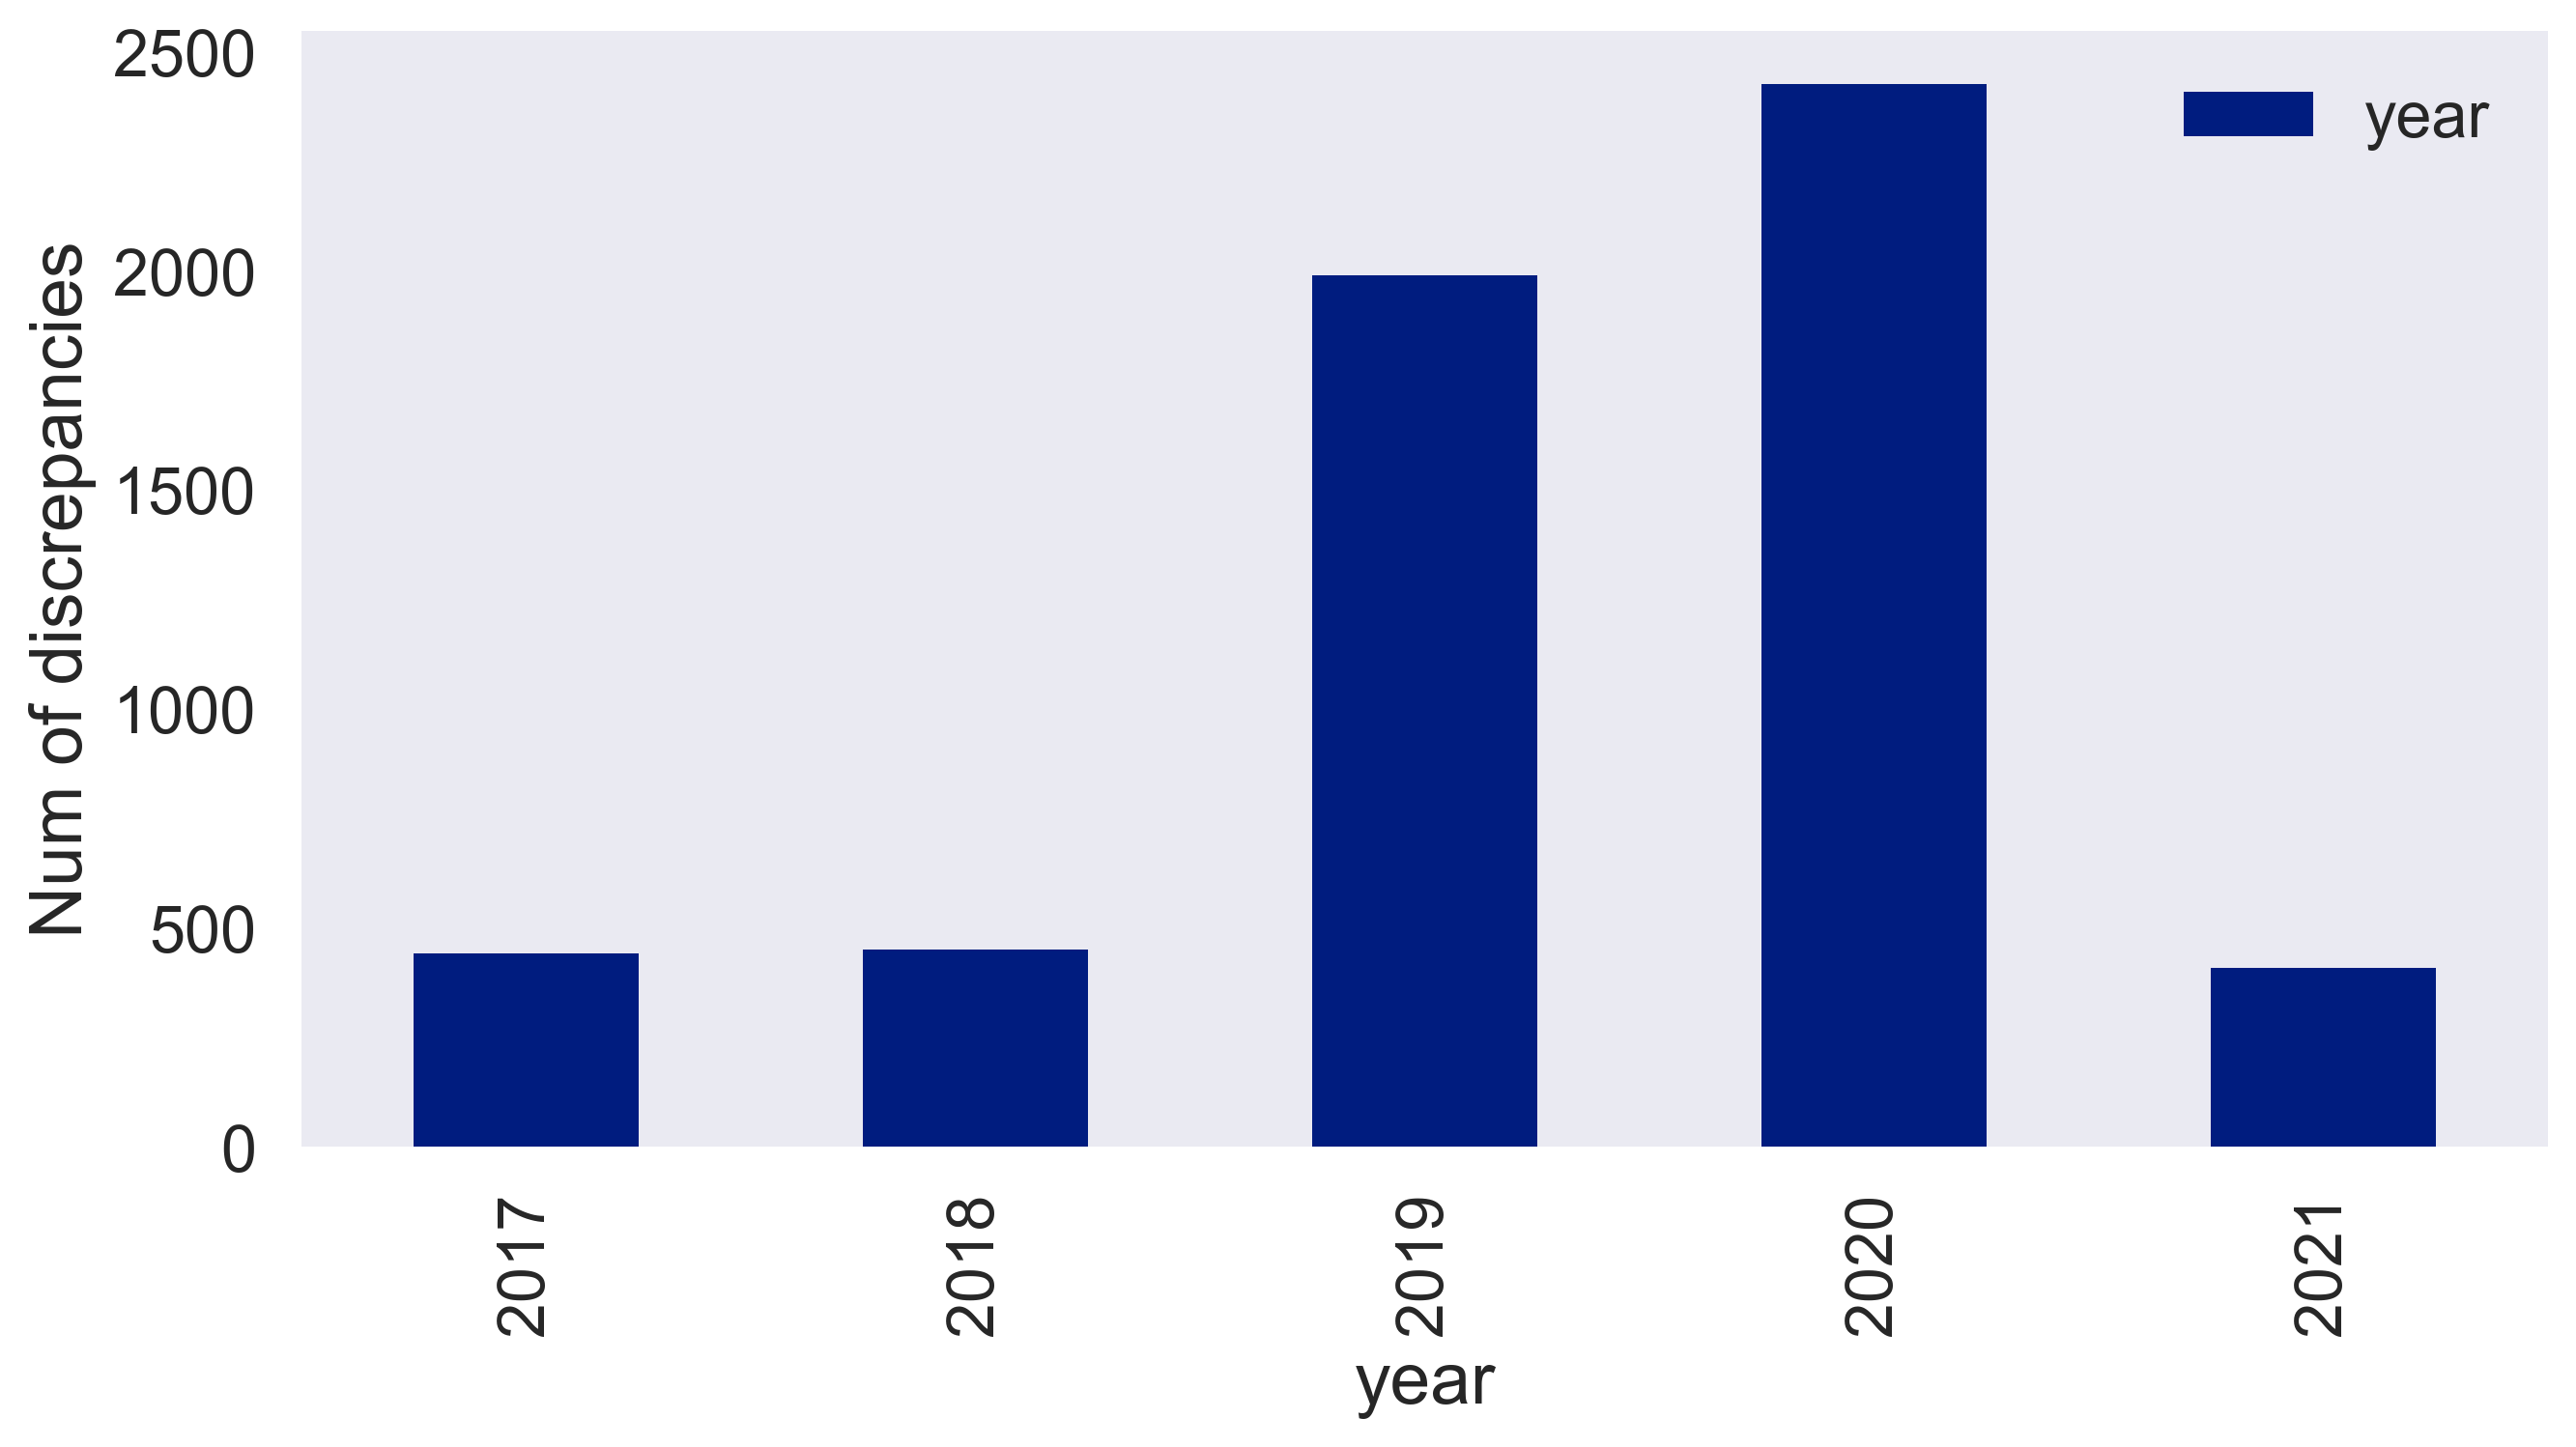

In [193]:
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi = 300)
num_of_months_report_discrep.year.value_counts().reset_index().sort_values(by = "index").plot(x = "index",kind = 'bar', ax=ax)
ax.set_xlabel("year", size=18); ax.set_ylabel("Num of discrepancies", size = 18)


Text(0, 0.5, 'Num of discrepancies')

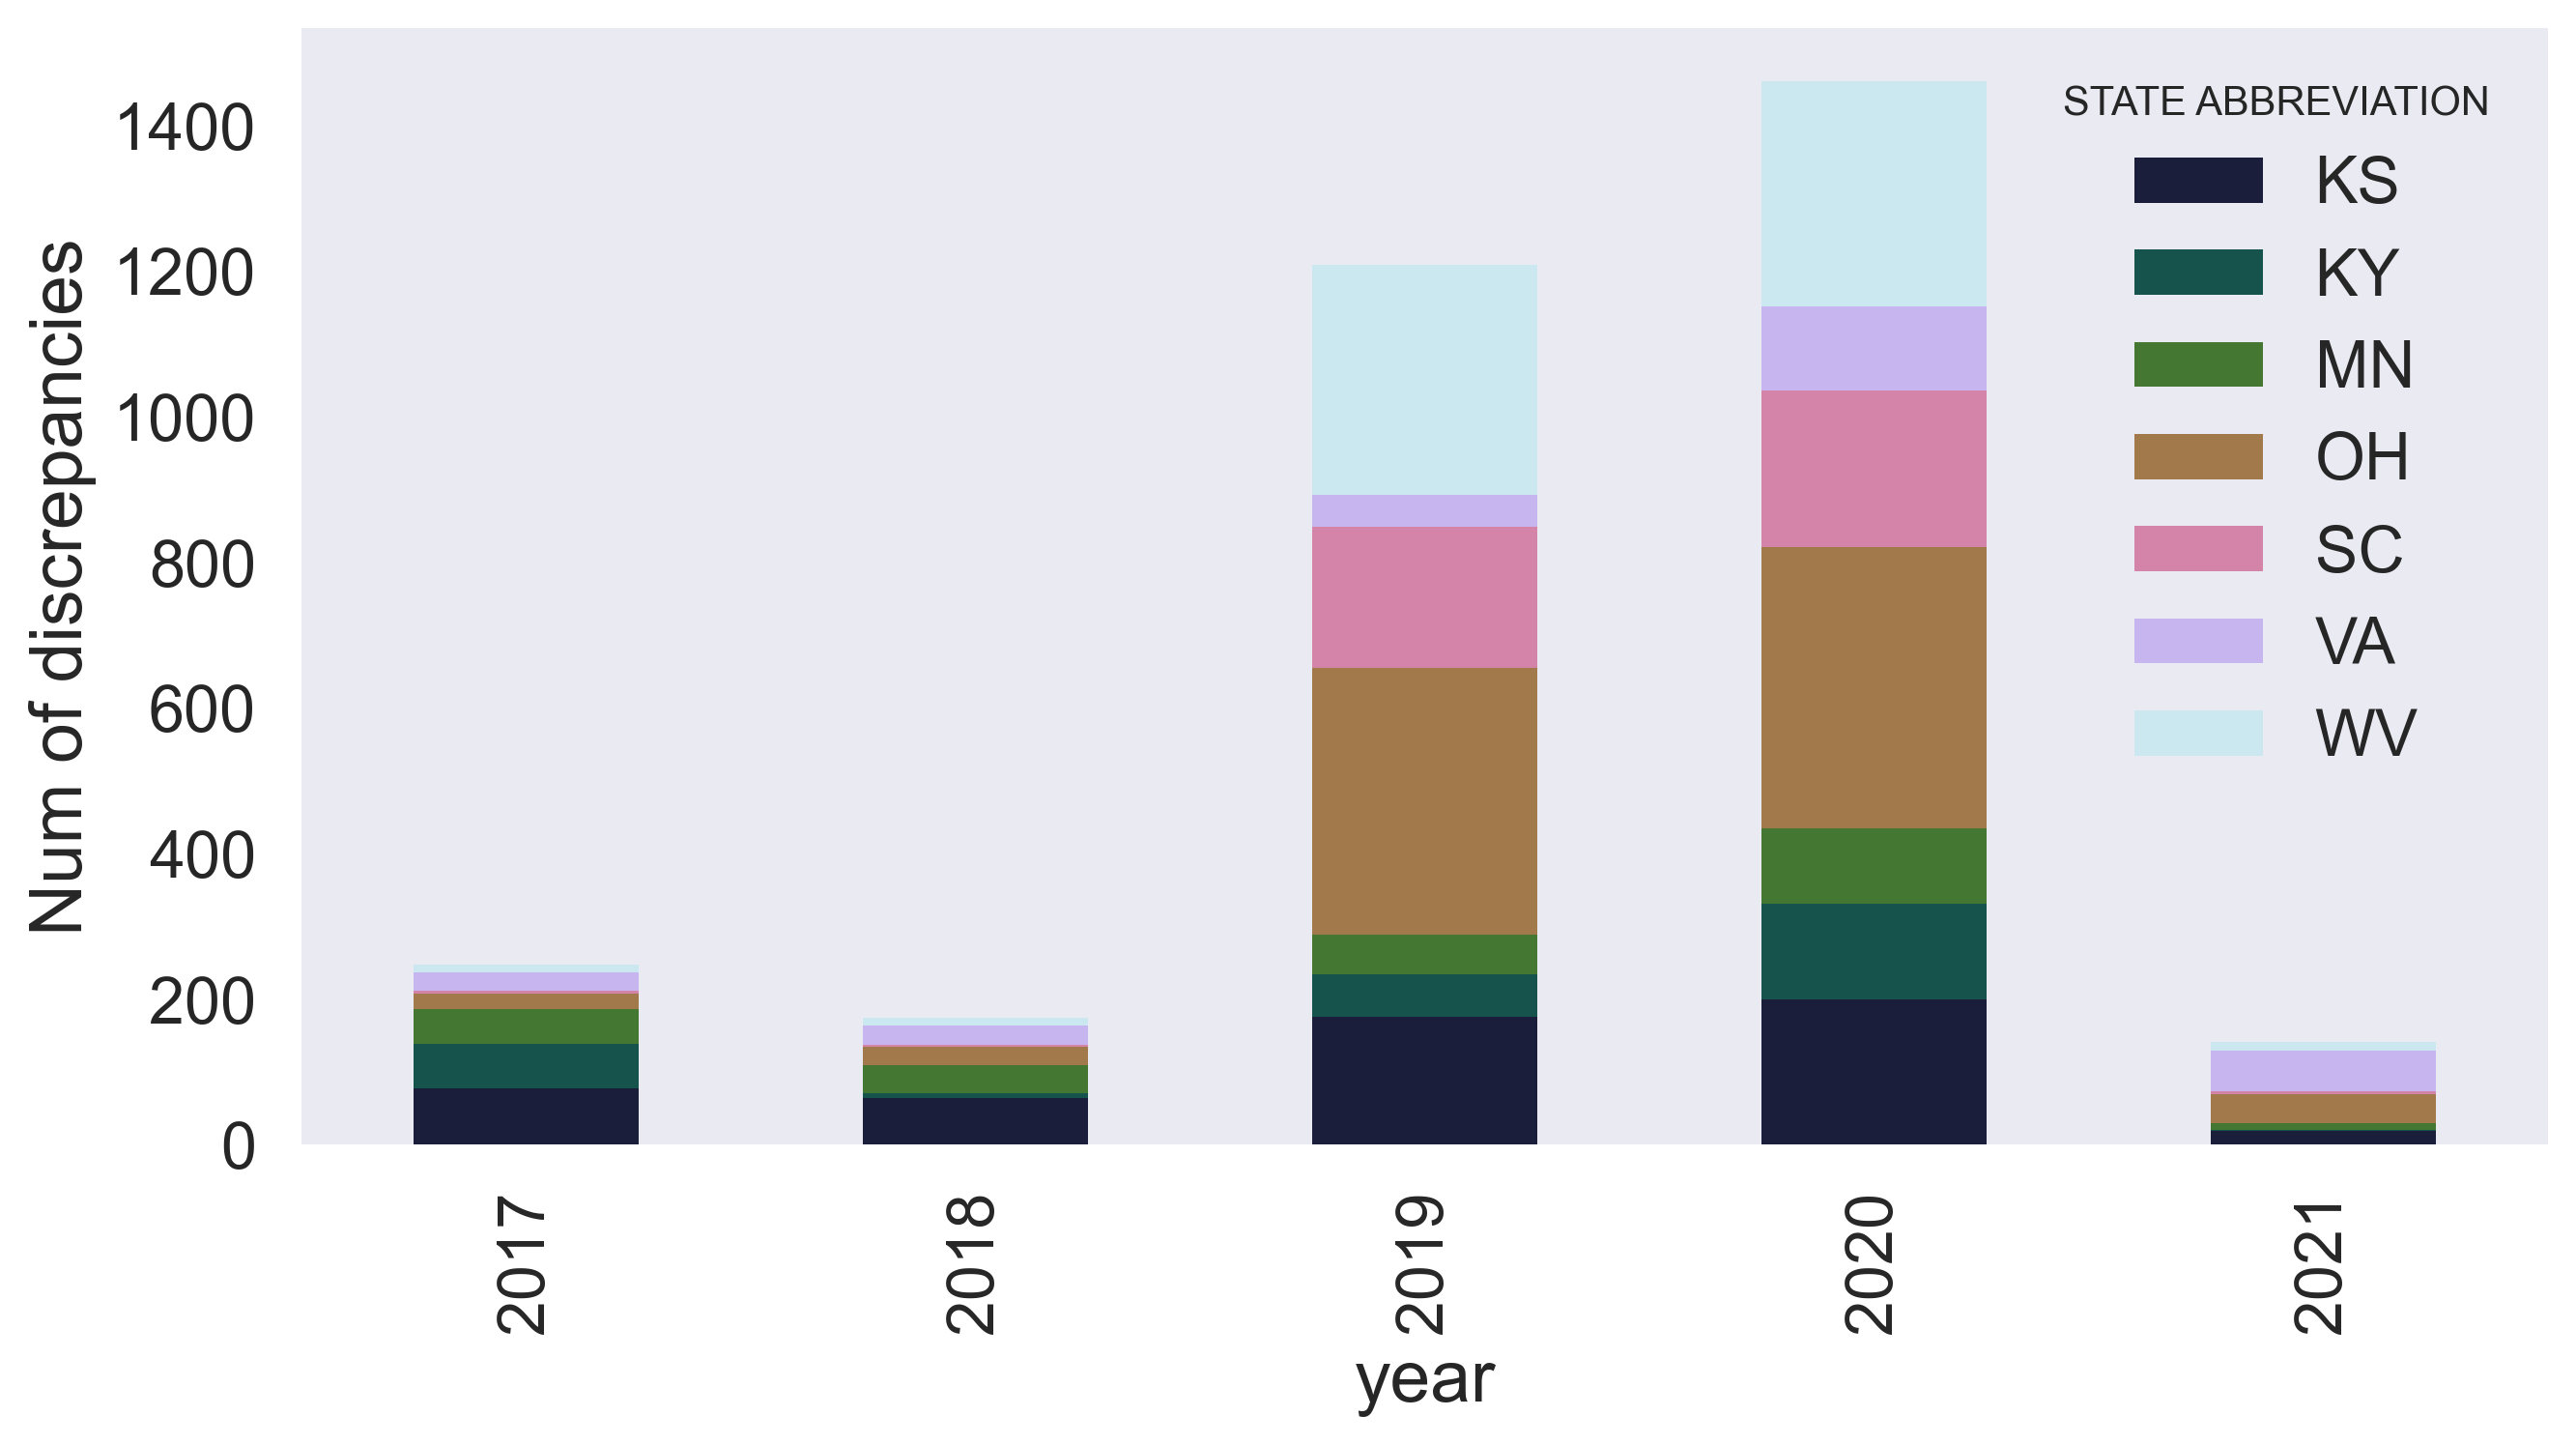

In [194]:
year_state_decr_count = (num_of_months_report_discrep.groupby(["year", "STATE ABBREVIATION"]).count().reset_index())

# Calculate the sum of values for each state
state_counts = year_state_decr_count.groupby('STATE ABBREVIATION')['ORI'].sum()

# Set a threshold for the minimum total value to be plotted
threshold = 200

# Filter out states with counts below the threshold
filtered_states = state_counts[state_counts >= threshold].index

# Filter the original DataFrame based on the selected states
df_filtered = (year_state_decr_count[year_state_decr_count['STATE ABBREVIATION'].isin(filtered_states)]
                         .pivot(index="year", columns="STATE ABBREVIATION", values="ORI")
)

colors = sns.color_palette("cubehelix", n_colors=len(filtered_states))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi = 300)
df_filtered.plot(kind = "bar", stacked=True, colormap=cmap1, ax = ax)
ax.set_xlabel("year", size=18); ax.set_ylabel("Num of discrepancies", size = 18)

In [137]:
df_filtered

STATE ABBREVIATION    AR    CO    GA    IA    IN     KS     KY     MN    NC  \
year                                                                          
2017                 3.0   5.0  11.0   7.0  29.0   78.0   61.0   48.0   NaN   
2018                 2.0  11.0  18.0  12.0  40.0   64.0    7.0   38.0  45.0   
2019                58.0  58.0  27.0  60.0  72.0  176.0   58.0   54.0   1.0   
2020                66.0  49.0  56.0  45.0  34.0  199.0  132.0  104.0  53.0   
2021                 4.0   7.0  15.0   7.0  13.0   19.0    1.0   10.0   5.0   

STATE ABBREVIATION     OH    OR     SC    TX     VA    WA     WV  
year                                                              
2017                 21.0   6.0    4.0  30.0   25.0   6.0   11.0  
2018                 25.0   4.0    3.0  24.0   27.0  14.0   11.0  
2019                367.0  69.0  194.0  37.0   44.0  45.0  315.0  
2020                386.0  54.0  215.0  77.0  115.0  44.0  309.0  
2021                 39.0   8.0    5.0  18.0   55.0   1.0   12.0

In [7]:
def transform_observe_covered_by_ORI(df:pd.DataFrame) -> pd.DataFrame:
    cols = ["ORI", "year","STATE ABBREVIATION" ,"COVERED-BY ORI", "CURRENT POPULATION 1","AGENCY INACTIVE DATE", "NUMBER OF MONTHS REPORTED"]
    return df[cols].query("`AGENCY INACTIVE DATE`.str.strip() != ''")

In [8]:
observe_cover = transform_observe_covered_by_ORI(all_df)

In [254]:
observe_cover.sort_values(by = ["NUMBER OF MONTHS REPORTED", "ORI"], ascending=[False, True])

ORI  year STATE ABBREVIATION COVERED-BY ORI  \
545    AR0041200  2020                 AR      AR0720200   
552    AR0041400  2019                 AR      AR0040000   
547    AR0041400  2020                 AR      AR0040000   
587    AR0060200  2006                 AR      AR0060000   
582    AR0120400  2020                 AR      AR0120000   
...          ...   ...                ...            ...   
21767  WY0210300  2017                 WY      WY0210000   
21888  WY0210300  2018                 WY      WY0210000   
22013  WY0210300  2019                 WY      WY0210000   
21279  WY0210300  2020                 WY      WY0210000   
21465  WY0210300  2021                 WY      WY0210000   

       CURRENT POPULATION 1 AGENCY INACTIVE DATE NUMBER OF MONTHS REPORTED  
545                  2826.0             12202001                        12  
552                     0.0             12201901                        12  
547                     0.0             12202001                        12  
587                   771.0             20070101                        12  
582                   232.0             12202001                        12  
...                     ...                  ...                       ...  
21767                2067.0             12201701                         0  
21888                2062.0             12201801                         0  
22013                2060.0             12201901                         0  
21279                2066.0             12202001                         0  
21465                2081.0             20211201                         0  

[91755 rows x 7 columns]

In [27]:
coverby_with_geo = geo_info.merge(observe_cover, 'inner', 'ORI').merge(geo_info[["ORI","agency_name_full"]],left_on="COVERED-BY ORI", right_on="ORI", suffixes=('', "_cover"), how = 'left' )
coverby_with_geo

ORI            agency_name_full   longitude   latitude  year  \
0      AK0011900       seldovia police dept. -152.322283  60.366668  2015   
1      AK0015000     saint paul police dept.  178.338813  51.959447  2011   
2      AK0015000     saint paul police dept.  178.338813  51.959447  2013   
3      AK0015000     saint paul police dept.  178.338813  51.959447  2012   
4      AL0011800  brighton police department  -86.896536  33.553444  1991   
...          ...                         ...         ...        ...   ...   
10244  WV0520100         hundred police dept  -80.634394  39.596574  1994   
10245  WV0520100         hundred police dept  -80.634394  39.596574  1995   
10246  WV0520100         hundred police dept  -80.634394  39.596574  1996   
10247  WV0520100         hundred police dept  -80.634394  39.596574  1997   
10248  WVWSP1500    state police grantsville  -81.115478  38.844159  2016   

      STATE ABBREVIATION COVERED-BY ORI  CURRENT POPULATION 1  \
0                     AK      AKAST0100                 276.0   
1                     AK      AKASP0000                 487.0   
2                     AK      AKAST0100                 496.0   
3                     AK      AKASP0000                 476.0   
4                     AL      AL0010000                4572.0   
...                  ...            ...                   ...   
10244                 WV      WV052SP00                 392.0   
10245                 WV      WV052SP00                 376.0   
10246                 WV      WV052SP00                 375.0   
10247                 WV      WV052SP00                 372.0   
10248                 WV      WVWSP1300                   0.0   

      AGENCY INACTIVE DATE NUMBER OF MONTHS REPORTED  ORI_cover  \
0                 20161201                         0        NaN   
1                 20121201                         0        NaN   
2                 20121201                         0        NaN   
3                 20121201                         0        NaN   
4                 19891101                         0  AL0010000   
...                    ...                       ...        ...   
10244             19891101                         0        NaN   
10245             19891101                         0        NaN   
10246             19891101                         0        NaN   
10247             19891101                         0        NaN   
10248             20170101                        12  WVWSP1300   

                  agency_name_full_cover  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4      jefferson county sheriff's office  
...                                  ...  
10244                                NaN  
10245                                NaN  
10246                                NaN  
10247                                NaN  
10248             state police glenville  

[10249 rows x 12 columns]

In [274]:
coverby_with_geo[coverby_with_geo.ORI_cover.isna()].sort_values(["CURRENT POPULATION 1", "ORI", "year"], ascending=(0,0,0))

ORI                            agency_name_full  longitude  \
9842  WI0450400    fox valley metropolitan police departmen -88.464988   
9841  WI0450400    fox valley metropolitan police departmen -88.464988   
9838  WI0450400    fox valley metropolitan police departmen -88.464988   
9840  WI0450400    fox valley metropolitan police departmen -88.464988   
9839  WI0450400    fox valley metropolitan police departmen -88.464988   
...         ...                                         ...        ...   
672   AL0630500  taylor hardin police department tuscaloosa -87.522860   
671   AL0630500  taylor hardin police department tuscaloosa -87.522860   
670   AL0630500  taylor hardin police department tuscaloosa -87.522860   
669   AL0630500  taylor hardin police department tuscaloosa -87.522860   
668   AL0630500  taylor hardin police department tuscaloosa -87.522860   

       latitude  year STATE ABBREVIATION COVERED-BY ORI  CURRENT POPULATION 1  \
9842  44.418226  2007                 WI      WI0451300               11093.0   
9841  44.418226  2006                 WI      WI0451300               10910.0   
9838  44.418226  2003                 WI      WI0451300               10895.0   
9840  44.418226  2005                 WI      WI0451300               10844.0   
9839  44.418226  2004                 WI      WI0451300               10809.0   
...         ...   ...                ...            ...                   ...   
672   33.290202  1995                 AL      AL0630000                   0.0   
671   33.290202  1994                 AL      AL0630000                   0.0   
670   33.290202  1993                 AL      AL0630000                   0.0   
669   33.290202  1992                 AL      AL0630000                   0.0   
668   33.290202  1991                 AL      AL0630000                   0.0   

     AGENCY INACTIVE DATE NUMBER OF MONTHS REPORTED ORI_cover  \
9842             19960201                         0       NaN   
9841             19960201                         0       NaN   
9838             19960201                         0       NaN   
9840             19960201                         0       NaN   
9839             19960201                         0       NaN   
...                   ...                       ...       ...   
672              19891101                         0       NaN   
671              19891101                         0       NaN   
670              19891101                         0       NaN   
669              19891101                         0       NaN   
668              19891101                         0       NaN   

     agency_name_full_cover  
9842                    NaN  
9841                    NaN  
9838                    NaN  
9840                    NaN  
9839                    NaN  
...                     ...  
672                     NaN  
671                     NaN  
670                     NaN  
669                     NaN  
668                     NaN  

[1186 rows x 12 columns]

WI0450400	fox valley metropolitan police departmen

delegates to 

WI0451300   Fox Valley Police Department

which does not exist, and might just be a change of name

In [288]:
coverby_with_geo[coverby_with_geo.ORI_cover.isna()].groupby("ORI")["CURRENT POPULATION 1"].max().reset_index().sort_values("CURRENT POPULATION 1", ascending=False).head(20)

ORI  CURRENT POPULATION 1
88  WI0450400               11093.0
44  NH0066000                6522.0
67  NH0087200                5950.0
4   FL0063400                5933.0
3   AR0540100                5803.0
34  NH0061000                5056.0
42  NH0065000                4872.0
65  NH0086600                4736.0
79  PA0431100                4010.0
26  NH0051800                3914.0
50  NH0072200                3781.0
54  NH0080800                3543.0
17  NH0022600                3482.0
41  NH0064800                3382.0
57  NH0081400                3288.0
13  NH0010400                3262.0
53  NH0080600                3200.0
56  NH0081200                3151.0
64  NH0085400                3093.0
60  NH0082600                2912.0

In [275]:
all_df.query("ORI == 'WI0451300' or ORI == 'WI0450400'")[['ORI', 'year', "CURRENT POPULATION 1", 'NUMBER OF MONTHS REPORTED', 'COVERED-BY ORI']].sort_values(["year", "ORI"])

ORI  year  CURRENT POPULATION 1 NUMBER OF MONTHS REPORTED  \
17750  WI0450400  1991                9326.0                         0   
17944  WI0450400  1992                9423.0                         0   
18098  WI0450400  1993                9657.0                         0   
18206  WI0450400  1994                9741.0                         0   
18209  WI0451300  1994                   0.0                         0   
18384  WI0450400  1995                9922.0                         0   
18387  WI0451300  1995               31026.0                         0   
18656  WI0450400  1996                9993.0                         0   
18659  WI0451300  1996               15623.0                         0   
18305  WI0450400  1997               10012.0                         0   
18308  WI0451300  1997               15653.0                         0   
18497  WI0450400  1998               10260.0                         0   
18501  WI0451300  1998               32128.0                         0   
19362  WI0450400  1999               10289.0                         0   
19367  WI0451300  1999               16107.0                         0   
19413  WI0450400  2000                   0.0                         0   
19418  WI0451300  2000                   0.0                         0   
19977  WI0450400  2001               10551.0                         0   
19982  WI0451300  2001               16741.0                         0   
20086  WI0450400  2002               10628.0                         0   
20091  WI0451300  2002               16862.0                         0   
20282  WI0450400  2003               10895.0                         0   
20287  WI0451300  2003               17115.0                         0   
20434  WI0450400  2004               10809.0                         0   
20439  WI0451300  2004               17088.0                         0   
20571  WI0450400  2005               10844.0                         0   
20576  WI0451300  2005               17137.0                         0   
20799  WI0450400  2006               10910.0                         0   
20805  WI0451300  2006               17163.0                         0   
20934  WI0450400  2007               11093.0                         0   
20941  WI0451300  2007               17525.0                         0   
21223  WI0450400  2008               17562.0                         0   
21230  WI0451300  2008                   0.0                         0   
21423  WI0450400  2009               17428.0                        12   
21430  WI0451300  2009                   0.0                         0   
21575  WI0450400  2010               17757.0                        12   
21582  WI0451300  2010                   0.0                         0   
21730  WI0450400  2011               20334.0                        12   
21737  WI0451300  2011                   0.0                         0   
21880  WI0450400  2012               20425.0                        12   
21887  WI0451300  2012                   0.0                         0   
22008  WI0450400  2013               20474.0                        12   
22015  WI0451300  2013                   0.0                         0   
22192  WI0450400  2014               20650.0                        12   
22199  WI0451300  2014                   0.0                         0   
22205  WI0450400  2015               21197.0                        12   
22212  WI0451300  2015                   0.0                         0   
22444  WI0450400  2016               21515.0                        12   
22451  WI0451300  2016                   0.0                         0   
21023  WI0450400  2017               21789.0                        12   
21140  WI0450400  2018               22006.0                        12   
21266  WI0450400  2019               22190.0                        12   
20534  WI0450400  2020               22737.0                        12   
20719  WI0450400 

In [294]:
(all_df.query("ORI == 'NH0066000' or ORI == 'NH306SP00'")[
    ['ORI', 'year', "CURRENT POPULATION 1", 'NUMBER OF MONTHS REPORTED', 'COVERED-BY ORI']]
    .sort_values(["year", "ORI"])
    .merge(geo_info[["ORI", "agency_name_full"]], on = "ORI", how = 'left')
)

ORI  year  CURRENT POPULATION 1 NUMBER OF MONTHS REPORTED  \
0   NH0066000  1991                6169.0                         0   
1   NH306SP00  1991               29758.0                         0   
2   NH0066000  1992                6202.0                         0   
3   NH306SP00  1992               29983.0                         0   
4   NH0066000  1993                6257.0                         0   
5   NH306SP00  1993               36189.0                         0   
6   NH0066000  1994                6323.0                         0   
7   NH306SP00  1994               36575.0                         0   
8   NH0066000  1995                6384.0                         0   
9   NH306SP00  1995               41254.0                         0   
10  NH0066000  1996                6461.0                         0   
11  NH306SP00  1996               41757.0                         0   
12  NH0066000  1997                6522.0                         0   
13  NH306SP00  1997               42152.0                         0   
14  NH0066000  1998                7167.0                         0   
15  NH306SP00  1998               33267.0                         0   
16  NH0066000  1999                7236.0                         0   
17  NH306SP00  1999               19550.0                         0   
18  NH0066000  2000                   0.0                         0   
19  NH306SP00  2000                   0.0                         0   
20  NH0066000  2001                7923.0                         0   
21  NH306SP00  2001               16587.0                         0   
22  NH0066000  2002                8023.0                         5   
23  NH306SP00  2002               15001.0                         0   
24  NH0066000  2003                8298.0                        12   
25  NH306SP00  2003                   0.0                         0   
26  NH0066000  2004                8390.0                         0   
27  NH306SP00  2004                   0.0                         0   
28  NH0066000  2005                8611.0                        12   
29  NH306SP00  2005                   0.0                         0   
30  NH0066000  2006                8763.0                        12   
31  NH306SP00  2006                   0.0                         0   
32  NH0066000  2007                9086.0                         0   
33  NH306SP00  2007                   0.0                         0   
34  NH0066000  2008                9251.0                        12   
35  NH306SP00  2008                   0.0                         0   
36  NH0066000  2009                9242.0                        12   
37  NH306SP00  2009                   0.0                         0   
38  NH0066000  2010                9240.0                        12   
39  NH306SP00  2010                   0.0                         0   
40  NH0066000  2011                8797.0                        12   
41  NH306SP00  2011                   0.0                         0   
42  NH0066000  2012                8824.0                        12   
43  NH306SP00  2012                   0.0                         0   
44  NH0066000  2013                8901.0                        12   
45  NH306SP00  2013                   0.0                         0   
46  NH0066000  2014                8916.0                        12   
47  NH306SP00  2014                   0.0                         0   
48  NH0066000  2015                8954.0                        12   
49  NH306SP00  2015                   0.0                         0   
50  NH0066000  2016                8937.0                        12   
51  NH306SP00  2016                   0.0                         0   
52  NH0066000  2017                8935.0                        12   
53  NH0066000  2018                8990.0                        12   
54  NH0066000  2019                9111.0                        12   
55  NH0066000  2020               

In [40]:
df_to_plot = pd.read_parquet("DATA/map_plot.pq")
reported = (df_to_plot.assign(report = lambda c: c["NUMBER OF MONTHS REPORTED"] > 0)
        .groupby("year")["report"]
        .sum().reset_index()
)

reported["counts"] = df_to_plot.groupby("year").count().reset_index()["ORI"]
reported["participation rate"] = reported["report"] / reported["counts"]

<Axes: xlabel='year'>

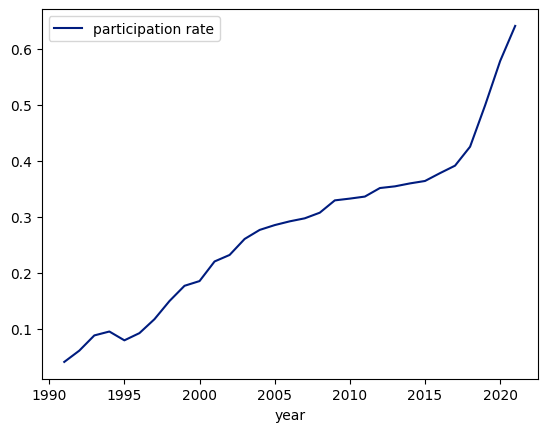

In [41]:
reported.plot(x = "year", y = "participation rate")

In [34]:
import networkx as nx

panel_graph : dict[int, nx.Graph] = dict()
for y in range(1991, 2022):
    subdf: pd.DataFrame = observe_cover.query("year == @y")
    G = nx.DiGraph(name = f"{y}")
    G.add_edges_from(zip(
        subdf["ORI"],
        subdf["COVERED-BY ORI"]
        )
    )

    panel_graph[y] = G

In [35]:
panel_graph[1991].edges

OutEdgeView([('AL0011500', 'AL0010000'), ('AL0011700', 'AL0010200'), ('AL0011800', 'AL0010000'), ('AL0012500', 'AL0010000'), ('AL0012800', 'AL0010000'), ('AL0013000', 'AL0010000'), ('AL0040200', 'AL0040000'), ('AL0050600', 'AL0050000'), ('AL0050700', 'AL0050000'), ('AL0060300', 'AL0060000'), ('AL0080300', 'AL0080000'), ('AL0100300', 'AL0100000'), ('AL0110600', 'AL0110000'), ('AL0110700', 'AL0110000'), ('AL0150200', 'AL0150000'), ('AL0150300', 'AL0150000'), ('AL0150400', 'AL0150000'), ('AL0150500', 'AL0150000'), ('AL0160400', 'AL0160000'), ('AL0180200', 'AL0180000'), ('AL0220200', 'AL0220000'), ('AL0230500', 'AL0230000'), ('AL0230600', 'AL0230000'), ('AL0240300', 'AL0240000'), ('AL0260400', 'AL0260000'), ('AL0260800', 'AL0260000'), ('AL0280200', 'AL0280000'), ('AL0280300', 'AL0280000'), ('AL0280400', 'AL0280000'), ('AL0280500', 'AL0280000'), ('AL0280600', 'AL0280000'), ('AL0280800', 'AL0280000'), ('AL0281000', 'AL0280000'), ('AL0281100', 'AL0280000'), ('AL0281200', 'AL0280000'), ('AL028

In [40]:

class ComponentElement:
    def __init__(self, nodes, position, name_labels) -> None:
        self.nodes = nodes
        self.position = position
        self.name_labels = name_labels

In [ ]:
# observe from largest components since 1991

fig, axs = plt.subplots(20,1, figsize=(10,200))
components_origin = sorted(nx.weakly_connected_components(panel_graph[1991]), key=len, reverse=True)
components_observed :list[ComponentElement] = []
names = dict(zip(geo_info["ORI"], geo_info["agency_name_full"]))
for i in range(20):
    subg = nx.subgraph(panel_graph[1991], components_origin[i])
    ns = {ori: names.get(ori, '') for ori in components_origin[i]}
    pos = nx.spring_layout(subg)

    components_observed.append(
        ComponentElement(
            components_origin[i],
            pos,
            ns
        )
    )
    nx.draw(subg, ax=axs[i], with_labels = True, labels = ns, pos=pos)
fig.show()

In [ ]:
for y in range(1991, 2022):
    fig, axs = plt.subplots(20,1, figsize=(10,200))
    for i,c in enumerate(components_observed):
        subg = nx.subgraph(panel_graph[y], c.nodes)
        nx.draw(subg, ax=axs[i], with_labels = True, labels = c.name_labels, pos=c.position)
    fig.savefig(f"./Results/coverby/{y}.png")


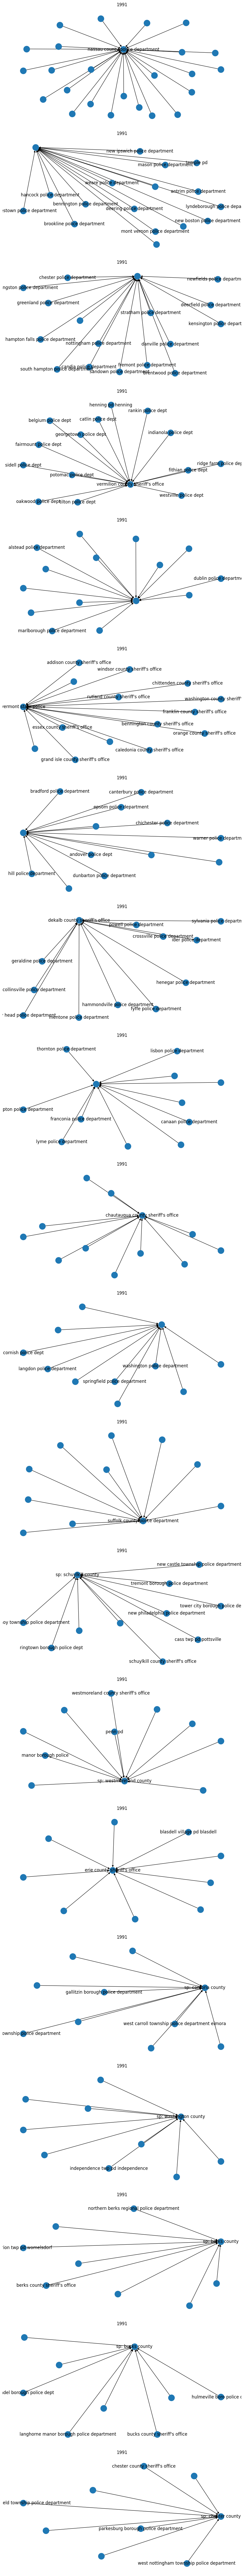

In [72]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Assuming you have the necessary imports and variables set up already

fig, axs = plt.subplots(20, 1, figsize=(10, 100))

def animate(year):
    # fig.clear()
    for i, c in enumerate(components_observed):
        axs[i].clear()
        subg = nx.subgraph(panel_graph[year], c.nodes)
        nx.draw(subg, ax=axs[i], with_labels=True, labels=c.name_labels, pos=c.position)
        axs[i].set_title(f"{year}")

ani = animation.FuncAnimation(fig, animate, frames=range(1991, 2022), repeat=True, interval = 10)
fig.tight_layout()
writer = animation.PillowWriter(fps=1)
ani.save("./Results/coverby_animation.gif", writer=writer, dpi=100)

In [63]:
fig.show()

/var/folders/jn/cpxfd61d5q51pz8dtwjztd0m0000gn/T/ipykernel_3377/89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [65]:
from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=30)
_animation.save("sine_example.gif", writer=writer)

/var/folders/jn/cpxfd61d5q51pz8dtwjztd0m0000gn/T/ipykernel_3377/1915859967.py:16: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(i, np.sin(i))


# New Data from CDE UCR

John proposes NIBRS data from this website:
https://cde.ucr.cjis.gov/LATEST/webapp/

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_20 = pd.read_csv("DATA/CDE/agencies-1960-1999.csv")
data_21 = pd.read_csv("DATA/CDE/agencies-2000-2022.csv")

In [9]:
data_20.head(20)

yearly_agency_id  agency_id  data_year        ori legacy_ori  \
0              11960          1       1960  AK0010100  AK0010100   
1              21960          2       1960  AK0010200  AK0010200   
2              31960          3       1960  AK0010300  AK0010300   
3              41960          4       1960  AK0010400  AK0010400   
4              51960          5       1960  AK0010500  AK0010500   
5              91960          9       1960  AK0010900  AK0010900   
6             471960         47       1960  AKASP0000  AKASP0000   
7             491960         49       1960  AL0010000  AL0010000   
8             501960         50       1960  AL0010100  AL0010100   
9             511960         51       1960  AL0010200  AL0010200   
10            521960         52       1960  AL0010300  AL0010300   
11            531960         53       1960  AL0010400  AL0010400   
12            541960         54       1960  AL0010500  AL0010500   
13            551960         55       1960  AL0010600  AL0010600   
14            561960         56       1960  AL0010700  AL0010700   
15            571960         57       1960  AL0010800  AL0010800   
16            581960         58       1960  AL0010900  AL0010900   
17            591960         59       1960  AL0011000  AL0011000   
18            621960         62       1960  AL0011300  AL0011300   
19            631960         63       1960  AL0011400  AL0011400   

   covered_by_legacy_ori direct_contributor_flag dormant_flag  dormant_year  \
0                    NaN                       N            N           NaN   
1                    NaN                       N            N           NaN   
2                    NaN                       N            N           NaN   
3                    NaN                       N            N           NaN   
4                    NaN                       N            N           NaN   
5                    NaN                       N            N           NaN   
6                    NaN                       N            N           NaN   
7                    NaN                       N            N           NaN   
8                    NaN                       N            N           NaN   
9                    NaN                       N            N           NaN   
10                   NaN                       N            N           NaN   
11                   NaN                       N            N           NaN   
12                   NaN                       N            N           NaN   
13                   NaN                       N            N           NaN   
14                   NaN                       N            N           NaN   
15                   NaN                       N            N           NaN   
16                   NaN                       N            N           NaN   
17                   NaN                       N            N           NaN   
18                   NaN                       N            N           NaN   
19                   NaN                       N            N           NaN   

   reporting_type  ... nibrs_off_eth_start_date covered_flag  \
0               S  ...                      NaN            N   
1               S  ...               2022-02-01            N   
2               S  ...               2022-10-01            N   
3               S  ...               2021-01-01            N   
4               S  ...               2021-12-01            N   
5               S  ...               2022-06-01            N   
6               S  ...                      NaN            N   
7               S  ...               2021-01-01            N   
8               S  ...                      NaN            N   
9               S  ...               2022-07-01            N   
10              S  ...               2021-01-01            N   
11              S  ...                      NaN            N   
12              S  ...                      NaN            N   
13              S  

In [12]:
all_participation_data = pd.concat([
    data_20[["data_year", "ori", "nibrs_participated", "ucr_agency_name"]],
    data_21[["data_year", "ori", "nibrs_participated", "ucr_agency_name"]]
    ])

In [22]:
compare_a = all_participation_data[(all_participation_data.data_year<= 2021) & (all_participation_data.data_year >= 1991) ].pivot_table(
    index="ori", columns="data_year", values="nibrs_participated", aggfunc="first").replace({
    'N':False, 'Y':True
}).fillna(False)
compare_a

data_year   1991   1992   1993   1994   1995   1996   1997   1998   1999  \
ori                                                                        
AK0010100  False  False  False  False  False  False  False  False  False   
AK0010200  False  False  False  False  False  False  False  False  False   
AK0010300  False  False  False  False  False  False  False  False  False   
AK0010400  False  False  False  False  False  False  False  False  False   
AK0010500  False  False  False  False  False  False  False  False  False   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
WY0230200  False  False  False  False  False  False  False  False  False   
WYATF0200  False  False  False  False  False  False  False  False  False   
WYDI05000  False  False  False  False  False  False  False  False  False   
WYWHP0000  False  False  False  False  False  False  False  False  False   
WYWHP0100  False  False  False  False  False  False  False  False  False   

data_year   2000  ...   2012   2013   2014   2015   2016   2017   2018   2019  \
ori               ...                                                           
AK0010100  False  ...  False  False  False  False  False  False  False  False   
AK0010200  False  ...  False  False  False  False  False  False  False  False   
AK0010300  False  ...  False  False  False  False  False  False  False  False   
AK0010400  False  ...  False  False  False  False  False  False  False  False   
AK0010500  False  ...  False  False  False  False  False  False  False  False   
...          ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
WY0230200  False  ...  False  False  False  False  False  False  False  False   
WYATF0200  False  ...  False  False  False  False  False  False  False  False   
WYDI05000  False  ...  False  False  False  False  False  False  False  False   
WYWHP0000  False  ...  False  False  False  False  False  False  False  False   
WYWHP0100  False  ...  False  False  False  False  False  False  False  False   

data_year   2020   2021  
ori                      
AK0010100  False  False  
AK0010200  False   True  
AK0010300  False  False  
AK0010400  False   True  
AK0010500  False   True  
...          ...    ...  
WY0230200  False  False  
WYATF0200  False  False  
WYDI05000  False   True  
WYWHP0000  False  False  
WYWHP0100  False  False  

[24659 rows x 31 columns]

## Compare with my construction

In [171]:
nibrs_df = pd.read_parquet("DATA/map_plot.pq")

## Filter those that are within the attribute data
compare_b = nibrs_df.assign(y = nibrs_df["NUMBER OF MONTHS REPORTED"]>0) \
    .pivot_table(index="ORI", columns="year", values="y", aggfunc='first').fillna(False)
compare_b

year        1991   1992   1993   1994   1995   1996   1997   1998   1999  \
ORI                                                                        
AK0010100  False  False  False  False  False  False  False  False  False   
AK0010200  False  False  False  False  False  False  False  False  False   
AK0010300  False  False  False  False  False  False  False  False  False   
AK0010400  False  False  False  False  False  False  False  False  False   
AK0010500  False  False  False  False  False  False  False  False  False   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
WY0230000  False  False  False  False  False  False  False  False  False   
WY0230100  False  False  False  False  False  False  False  False  False   
WY0230200  False  False  False  False  False  False  False  False  False   
WYDI05000  False  False  False  False  False  False  False  False  False   
WYWHP0000  False  False  False  False  False  False  False  False  False   

year        2000  ...   2012   2013   2014   2015   2016   2017   2018   2019  \
ORI               ...                                                           
AK0010100  False  ...  False  False  False  False  False  False  False  False   
AK0010200  False  ...  False  False  False  False  False  False  False  False   
AK0010300  False  ...  False  False  False  False  False  False  False  False   
AK0010400  False  ...  False  False  False  False  False  False  False  False   
AK0010500  False  ...  False  False  False  False  False  False  False  False   
...          ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
WY0230000  False  ...  False  False  False  False  False  False  False  False   
WY0230100  False  ...  False  False  False  False  False  False  False  False   
WY0230200  False  ...  False  False  False  False  False  False  False  False   
WYDI05000  False  ...  False  False  False  False  False  False  False  False   
WYWHP0000  False  ...  False  False  False  False  False  False  False  False   

year        2020   2021  
ORI                      
AK0010100  False  False  
AK0010200  False   True  
AK0010300  False  False  
AK0010400  False   True  
AK0010500  False   True  
...          ...    ...  
WY0230000  False   True  
WY0230100   True   True  
WY0230200  False  False  
WYDI05000  False   True  
WYWHP0000  False   True  

[17053 rows x 31 columns]

check those with common agencies

In [172]:
common_ori = sorted(set(compare_a.index) & set(compare_b.index))

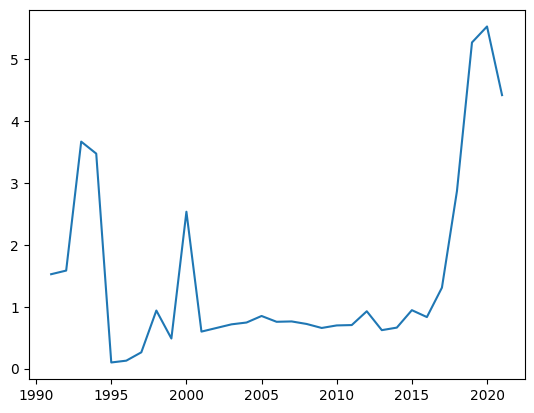

In [173]:
plt.plot(np.mean(compare_a.loc[common_ori,:] != compare_b.loc[common_ori,:], axis=0) * 100)

In [169]:
pd.DataFrame({'CDE' : np.mean(compare_a.loc[common_ori,:], axis=0), 'MY' : np.mean(compare_b.loc[common_ori,:], axis=0)})

CDE        MY
1991  0.019469  0.025274
1992  0.036123  0.038762
1993  0.038879  0.052308
1994  0.047558  0.042339
1995  0.067906  0.047147
1996  0.080220  0.059872
1997  0.101331  0.078989
1998  0.127133  0.099806
1999  0.154987  0.127544
2000  0.186243  0.132938
2001  0.199906  0.168768
2002  0.211576  0.176802
2003  0.239665  0.207119
2004  0.256260  0.227526
2005  0.265525  0.229402
2006  0.276022  0.238023
2007  0.284759  0.252096
2008  0.296781  0.263825
2009  0.322700  0.289568
2010  0.329561  0.283997
2011  0.335308  0.291503
2012  0.354131  0.316718
2013  0.357884  0.311734
2014  0.364042  0.316894
2015  0.370844  0.329971
2016  0.382513  0.348384
2017  0.388847  0.345746
2018  0.410426  0.356242
2019  0.485369  0.457456
2020  0.561895  0.518736
2021  0.680291  0.506714

Text(0, 0.5, 'My NIBRS Participation Rate')

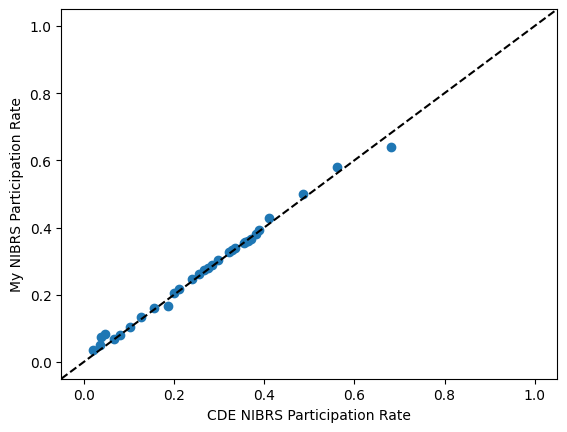

In [174]:
plt.scatter(np.mean(compare_a.loc[common_ori,:], axis=0),np.mean(compare_b.loc[common_ori,:], axis=0),)
plt.axline([0,0], [1,1], color = 'k', ls = '--')
plt.xlabel("CDE NIBRS Participation Rate"); plt.ylabel("My NIBRS Participation Rate")

# Examine Solicitation Effect

In [113]:
subsidy_list = pd.read_csv("DATA/ManualCorrected_NCSXProjectWithORI9.csv")
subsidy_list

Unnamed: 0    FY                                              Title  \
0             0  2015  Expanding the State of Wyoming''s Capacity to ...   
1             1  2017   Wyoming's Expansion of Incident-Based Reporting    
2             2  2019  Whiting Police Department NIBRS Compliance Pro...   
3             3  2018  National Incident Based Reporting System Trans...   
4             4  2015  Washington State NIBRS Repository Replacement ...   
..          ...   ...                                                ...   
176         176  2017  Project Incident-Based Reporting Arizona (IBRAZ)    
177         177  2019  National Crime Statistics Exchange (NCS-X) Imp...   
178         178  2017  Alameda County Sheriff's Office (ACSO) NCS-X I...   
179         179  2015  Full Implementation of the UCR Local Template ...   
180         180  2016                                 2016 NCS-X program   

                                 Original Solicitation  \
0    BJS FY 15 2015 National Crime Statistics Excha...   
1    FY 2017 National Crime Statistics Exchange (NC...   
2    FY 2019 NCS-X Implementation Assistance Progra...   
3    FY 2018 NCS-X Implementation Assistance Progra...   
4    BJS FY 15 2015 National Crime Statistics Excha...   
..                                                 ...   
176  2017 NCS-X Implementation Assistance Program: ...   
177  FY 2019 NCS-X Implementation Assistance Progra...   
178  2017 NCS-X Implementation Assistance Program: ...   
179  BJS FY 15 2015 National Crime Statistics Excha...   
180  National Crime Statistics Exchange (NCS-X) Imp...   

                                             Recipient         State  \
0     Wyoming Office of the Attorney General            WY             
1     Wyoming Office of the Attorney General            WY             
2                           WHITING, CITY OF            IN             
3     WASHINGTON COUNTY BOARD OF SUPERVISORS            MS             
4    Washington Association of Sheriffs and Police ...  WA             
..                                                 ...           ...   
176      ARIZONA DEPARTMENT OF PUBLIC SAFETY            AZ             
177                         ARCADIA, CITY OF            CA             
178                       ALAMEDA, COUNTY OF            CA             
179     Alabama State Law Enforcement Agency            AL             
180     Alabama State Law Enforcement Agency            AL             

        Award Number         Amount                                  Status  \
0    2015-VF-GX-K057    $526,813.00                        Closed             
1    2015-VF-GX-K057     $38,640.00                        Closed             
2    2019-FU-CX-K026      $8,500.00  Past Project Period End Date             
3    2018-MU-CX-K039    $200,048.00                        Closed             
4    2015-VF-GX-K052    $385,183.00                        Closed             
..               ...            ...                                     ...   
176  2017-FU-CX-K047    $774,000.00                        Closed             
177  2019-FU-CX-K005    $100,000.00                        Closed             
178  2017-MU-CX-K051  $1,249,311.00  Past Project Period End Date             
179  2015-VF-GX-K150    $338,664.00                        Closed             
180  2015-VF-GX-K150    $452,000.00                        Closed             

     Agency_id                                             Agency       ORI9  
0          NaN                                                NaN        NaN  
1          NaN                                                NaN        NaN  
2          NaN                                                NaN        NaN  
3          NaN                                                NaN        NaN  
4          NaN                                                NaN        NaN  
..         ...                                                ...        ...  
176        NaN              

In [84]:
subsidy_stat = subsidy_list[["ORI9"]].value_counts().sort_values(ascending=False)
subsidy_stat

ORI9     
ILCPD0000    4
IN0430300    3
IA0060400    3
FL0370100    3
NB0280200    3
            ..
NY1010000    1
MDBPD0000    1
             1
MD0172100    1
oh0080400    1
Length: 67, dtype: int64

In [109]:
received_agencies = subsidy_stat.reset_index()['ORI9'].str.upper()

not_in_all_agencies = set(received_agencies) - set(compare_b.index)
print(not_in_all_agencies)

compare_b.loc[set(received_agencies) - not_in_all_agencies,:]

{'FL0370100', 'IN0490500', 'IA0060400', ' ', 'IN0430300', 'NJNSP0000', 'ALAST0000', 'NV0131500', 'MNBCA8000', 'NY1010000'}


C:\Users\tedb0\AppData\Local\Temp\ipykernel_11136\318452685.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  compare_b.loc[set(received_agencies) - not_in_all_agencies,:]


year        1991   1992   1993   1994   1995   1996   1997   1998   1999  \
ORI                                                                        
MEMSP0000  False  False  False  False  False  False  False  False  False   
OH0080400  False  False  False  False  False  False  False  False  False   
MOMHP0000  False  False  False  False  False  False  False  False  False   
WY0150100  False  False  False  False  False  False  False  False  False   
MO0390300  False  False  False  False  False  False  False  False  False   
NB0280200  False  False  False  False  False  False  False  False  False   
AZ0071300  False  False  False  False  False  False  False  False  False   
MO0580300  False  False  False  False  False  False  False  False  False   
AZ0071700  False  False  False  False  False  False  False  False  False   
CA0349900  False  False  False  False  False  False  False  False  False   
AZ0100300  False  False  False  False  False  False  False  False  False   
IL0161400  False  False  False  False  False  False  False  False  False   
NB0710100  False  False  False  False  False  False  False   True   True   
CO0430400  False  False  False  False  False  False  False  False  False   
CA0194100  False  False  False  False  False  False  False  False  False   
ILCPD0000  False  False  False  False  False  False  False  False  False   
IL0920300  False  False   True   True  False  False  False  False  False   
OK0240100  False  False  False  False  False  False  False  False  False   
ME0120000  False  False  False  False  False  False  False  False  False   
MDMSP0000  False  False  False  False  False  False  False  False  False   
OK0550600  False  False  False  False  False  False  False  False  False   
AZ0100000  False  False  False  False  False  False  False  False  False   
GA0670200  False  False  False  False  False  False  False  False  False   
HI0020000  False  False  False  False  False  False  False  False  False   
TXSPD0000  False  False  False  False  False  False  False  False  False   
AL0250200   True   True  False  False  False  False  False  False  False   
ME0070200  False  False  False  False  False  False  False  False  False   
NV0020100  False  False  False  False  False  False  False  False  False   
GA1360200  False  False  False  False  False  False  False  False  False   
IL0165A00  False  False   True   True  False  False  False  False  False   
AL0340100   True   True  False  False  False  False  False  False  False   
DE0010300  False  False  False  False  False  False  False  False  False   
CA0440200  False  False  False  False  False  False  False  False  False   
PA0362600  False  False  False  False  False  False  False  False  False   
CA0190200  False  False  False  False  False  False  False  False  False   
MD0172100  False  False  False  False  False  False  False  False  False   
GA1210300  False  False  False  False  False  False  False  False  False   
NY0510100  False  False  False  False  False  False  False  False  False   
MD0220300  False  False  False  False  False  False  False  False  False   
CA0431400  False  False  False  False  False  False  False  False  False   
AR0750300  False  False  False  False  False  False  False  False  False   
MS0550200  False  False  False  False  False  False  False  False  False   
NM0010100  False  False  False  False  False  False  False  False  False   
AK0010800  False  False  False  False  False  False  False  False  False   
GAAPD0000  False  False  False  False  False  False  False  False  False   
AZ0072300  False  False  False  False  False  False  False  False  False   
CA0280200  False  False  False  False  False  False  False  False  False   
CA0330300  False  False  False  False  False  False  False  False  False   
CA0371100  False  False  False  False  False  False  False  False  False   
MS0500100  False  False  False  False  False  False  False  False  False   
CA0570300  False  False  False  False  False  Fa

In [111]:

np.mean(compare_b.loc[set(received_agencies) - not_in_all_agencies,:].iloc[:,-1])

C:\Users\tedb0\AppData\Local\Temp\ipykernel_11136\845918000.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  np.mean(compare_b.loc[set(received_agencies) - not_in_all_agencies,:].iloc[:,-1])


0.6491228070175439

## What about states?

In [160]:
subsidy_stat_state = pd.DataFrame(subsidy_list[["State"]].value_counts().sort_values(ascending=False)).reset_index()
subsidy_stat_state.columns = ['state', 'part']
subsidy_stat_state['state'] = subsidy_stat_state['state'].str.strip()

In [179]:
subsidy_stat_state

state  part
0     CA    28
1     NC    16
2     IL    14
3     NY    11
4     GA    10
5     MD     9
6     AZ     9
7     IN     8
8     NE     6
9     PA     5
10    MO     5
11    TX     5
12    WI     5
13    MS     4
14    NM     4
15    NV     4
16    OK     4
17    WY     4
18    LA     3
19    FL     3
20    AL     3
21    ME     3
22    MN     3
23    HI     2
24    DC     1
25    WA     1
26    UT     1
27    SD     1
28    RI     1
29    IA     1
30    OR     1
31    MT     1
32    KS     1
33    MA     1
34    NJ     1
35    ND     1
36    AK     1

compare with 2020 state data

In [161]:
real_participate_rate_2020 = nibrs_df.assign(part = nibrs_df['NUMBER OF MONTHS REPORTED']>0, state = nibrs_df['ORI'].str[:2]).query('year == 2020').groupby("state").agg('mean')[["part"]].reset_index()
real_participate_rate_2020

C:\Users\tedb0\AppData\Local\Temp\ipykernel_11136\2209950994.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  real_participate_rate_2020 = nibrs_df.assign(part = nibrs_df['NUMBER OF MONTHS REPORTED']>0, state = nibrs_df['ORI'].str[:2]).query('year == 2020').groupby("state").agg('mean')[["part"]].reset_index()


state      part
0     AK  0.000000
1     AL  0.313869
2     AR  0.989247
3     AZ  0.235772
4     CA  0.015773
5     CO  0.979167
6     CT  0.980583
7     DC  0.500000
8     DE  1.000000
9     FL  0.000000
10    GA  0.628433
11    HI  0.250000
12    IA  0.995781
13    ID  0.971963
14    IL  0.010345
15    IN  0.439560
16    KS  0.997283
17    KY  0.997590
18    LA  0.309322
19    MA  0.889807
20    MD  0.014423
21    ME  0.538462
22    MI  0.988836
23    MN  0.962025
24    MO  0.545936
25    MS  0.317391
26    MT  0.945946
27    NB  0.484733
28    NC  0.724070
29    ND  0.961165
30    NH  0.930481
31    NJ  0.000000
32    NM  0.134454
33    NV  0.440000
34    NY  0.173310
35    OH  0.868227
36    OK  0.901042
37    OR  0.963731
38    PA  0.022003
39    RI  0.958333
40    SC  0.997768
41    SD  0.956522
42    TN  0.997797
43    TX  0.711538
44    UT  0.812030
45    VA  1.000000
46    VT  1.000000
47    WA  0.931034
48    WI  0.663317
49    WV  1.000000
50    WY  0.358209

<AxesSubplot: xlabel='part_x', ylabel='part_y'>

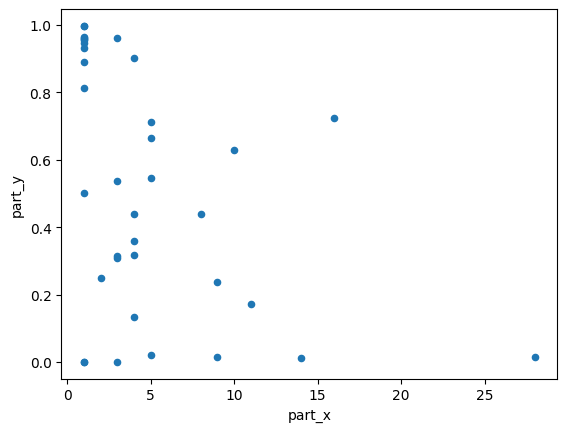

In [178]:
subsidy_stat_state.merge(real_participate_rate_2020, on='state').plot(x = 'part_x', y = 'part_y', kind='scatter')